In [1311]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# PANDAS & VISUALISATION


In [1312]:
df_pop = pd.read_csv("df_pop.csv")

In [1313]:
df_veg = pd.read_csv("df_veg.csv")

In [1314]:
df_anim = pd.read_csv("df_anim.csv")




- Supprimer les espaces au début et à la fin des titres (s’il y en a)
- Remplacer les espaces par des underscores (ceux se situant entre les mots)
- Tout mettre en minuscule


In [1315]:
df_pop.columns = df_pop.columns.str.strip().str.replace(" ", "_").str.lower()
df_pop.shape

(366, 14)

In [1316]:
df_veg.columns = df_veg.columns.str.strip().str.replace(" ", "_").str.lower()
df_veg.shape

(93458, 14)

In [1317]:
df_anim.columns = df_anim.columns.str.strip().str.replace(" ", "_").str.lower()

df_anim.shape

(31542, 14)

- Quelle sont les dimensions des jeux de données ?
- A quoi ressemblent les 5 premières lignes de mes jeux de données ?


In [1318]:
df_pop.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


In [1319]:
df_anim.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [1320]:
df_veg.head()

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


- Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’.
- Regroupez les deux jeux de données en 1 et appelez ce DataFrame product.

In [1321]:
df_anim = df_anim.assign(type="animal")

In [1322]:
df_veg = df_veg.assign(type="vegetal")

In [1323]:
product = pd.concat([df_anim, df_veg], ignore_index=True)
product.head()

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value,animal
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value,animal
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value,animal
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value,animal


- Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population
- Renommer la colonne ‘value’ en ‘pop_1000_hab’.


In [1324]:
df_pop = df_pop.loc[:, ["area_code_(m49)", "area", "year", "value"]]


In [1325]:
df_pop = df_pop.rename(columns={"value": "pop_1000_hab"})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,37172.00
1,4,Afghanistan,2019,38041.75
2,8,Albania,2018,2883.00
3,8,Albania,2019,2880.92
4,12,Algeria,2018,42228.00
...,...,...,...,...
361,887,Yemen,2019,29161.92
362,894,Zambia,2018,17352.00
363,894,Zambia,2019,17861.03
364,716,Zimbabwe,2018,14438.80


- Transformez products afin de ne garder que les colonnes **area_code_(fao)**, **area,** **element,** **item,**  **year,** **type,** **unit,** **value**

In [1326]:
product = product.loc[:, ["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
product


,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,animal,kg,2.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,animal,kg,2.73
2,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,animal,kcal/capita/day,15.42
3,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,animal,kcal/capita/day,16.03
4,4,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,animal,g/capita/day,1.09
...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,vegetal,kcal/capita/day,2.94
124996,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/capita/day,0.04
124997,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,vegetal,g/capita/day,0.09
124998,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/capita/day,0.01


- Fusionnez df_pop avec products et nommez ce DataFrame df.
- Renommer les colonnes comme sur la capture d’écran ci-dessous.(cf google doc)


In [1327]:
df_pop = df_pop.rename(columns={"area_code_(m49)": "area_code_(fao)"})
product = product.rename(columns={"area_code_(m49)": "area_code_(fao)"})

In [1328]:
df = pd.merge(df_pop, product, on=["area_code_(fao)", "area", "year",])
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,unit,value
0,4,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Bovine Meat,animal,kg,2.62
1,4,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Bovine Meat,animal,kcal/capita/day,15.42
2,4,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.09
3,4,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.20
4,4,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,animal,kg,4.26
...,...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),Infant food,vegetal,g/capita/day,0.00
124996,716,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Miscellaneous,vegetal,kg,2.62
124997,716,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Miscellaneous,vegetal,kcal/capita/day,2.94
124998,716,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Miscellaneous,vegetal,g/capita/day,0.09


In [1329]:
df = df.loc[:, ["area_code_(fao)", "area", "item", "year", "type", "element", "pop_1000_hab", "value"]]
df


,area_code_(fao),area,item,year,type,element,pop_1000_hab,value
0,4,Afghanistan,Bovine Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,2.62
1,4,Afghanistan,Bovine Meat,2018,animal,Food supply (kcal/capita/day),37172.00,15.42
2,4,Afghanistan,Bovine Meat,2018,animal,Protein supply quantity (g/capita/day),37172.00,1.09
3,4,Afghanistan,Bovine Meat,2018,animal,Fat supply quantity (g/capita/day),37172.00,1.20
4,4,Afghanistan,Mutton & Goat Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,4.26
...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,Infant food,2019,vegetal,Fat supply quantity (g/capita/day),14645.47,0.00
124996,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply quantity (kg/capita/yr),14645.47,2.62
124997,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply (kcal/capita/day),14645.47,2.94
124998,716,Zimbabwe,Miscellaneous,2019,vegetal,Protein supply quantity (g/capita/day),14645.47,0.09


- Quelles sont les types de données de chaque colonne?

In [1330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 124999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code_(fao)  125000 non-null  int64  
 1   area             125000 non-null  object 
 2   item             125000 non-null  object 
 3   year             125000 non-null  int64  
 4   type             125000 non-null  object 
 5   element          125000 non-null  object 
 6   pop_1000_hab     125000 non-null  float64
 7   value            125000 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.6+ MB


- Combien y-a t’il de valeurs manquantes par variable ?

In [1331]:
valeur_manquant = df.isnull().sum()
valeur_manquant

area_code_(fao)    0
area               0
item               0
year               0
type               0
element            0
pop_1000_hab       0
value              0
dtype: int64

In [1332]:
valeur_nan = df.isna().sum()
valeur_nan

area_code_(fao)    0
area               0
item               0
year               0
type               0
element            0
pop_1000_hab       0
value              0
dtype: int64

- Est-ce qu’il y a des valeurs aberrantes ?
-  Utilisez un récapitulatif statistique 

In [1333]:
df.describe().round(3)

,area_code_(fao),year,pop_1000_hab,value
count,125000.000,125000.000,125000.000,125000.000
mean,425.301,2018.509,51431.253,11.001
std,250.726,0.500,187253.858,56.218
min,4.000,2018.000,10.760,-0.030
25%,204.000,2018.000,2801.000,0.000
50%,418.000,2019.000,9965.000,0.190
75%,642.000,2019.000,31825.290,2.800
max,894.000,2019.000,1465634.160,1779.760


- Affichez les valeurs uniques de la colonne area

In [1334]:
print(df["area"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Icel

- Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. 
- Les valeurs de la colonne element doivent être séparées dans des colonnes différentes.

In [1335]:
df_v2 = pd.pivot_table(df, index=["area_code_(fao)", "area", "year", "pop_1000_hab", "type", "item"], columns="element", values="value")
df_v2 = df.reset_index()


- Faire du nettoyage dans le nom des colonnes

In [1336]:
df_v2.columns = df_v2.columns.str.strip().str.replace(" ", "_").str.lower()


In [1337]:
df_v2

,index,area_code_(fao),area,item,year,type,element,pop_1000_hab,value
0,0,4,Afghanistan,Bovine Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,2.62
1,1,4,Afghanistan,Bovine Meat,2018,animal,Food supply (kcal/capita/day),37172.00,15.42
2,2,4,Afghanistan,Bovine Meat,2018,animal,Protein supply quantity (g/capita/day),37172.00,1.09
3,3,4,Afghanistan,Bovine Meat,2018,animal,Fat supply quantity (g/capita/day),37172.00,1.20
4,4,4,Afghanistan,Mutton & Goat Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,4.26
...,...,...,...,...,...,...,...,...,...
124995,124995,716,Zimbabwe,Infant food,2019,vegetal,Fat supply quantity (g/capita/day),14645.47,0.00
124996,124996,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply quantity (kg/capita/yr),14645.47,2.62
124997,124997,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply (kcal/capita/day),14645.47,2.94
124998,124998,716,Zimbabwe,Miscellaneous,2019,vegetal,Protein supply quantity (g/capita/day),14645.47,0.09


- Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018


In [1338]:
masque = (df_v2["year"] == 2018)
masque1 = (df_v2["year"] == 2019)

In [1339]:
yr_2018 = df_v2[masque]
yr_2019 = df_v2[masque1]

- Ajouter une nouvelle colonne à notre jeu de données : la zone géographique. 

In [1340]:
list_geo_zone = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 
             'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 
             'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 
             'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']

def cleaning_csv(arg=list_geo_zone[0]):
    cleaned_df = pd.read_csv("geo_zone/"+arg+".csv")
    cleaned_df = cleaned_df.rename(columns=lambda x: x.strip().replace(" ", "_").lower())
    cleaned_df = cleaned_df.rename(columns={"area_code_(m49)": "area_code_(fao)"})
    cleaned_df = cleaned_df.drop(["domain_code","domain","element_code","element","item_code_(cpc)","item","year_code","year","unit","value","flag","flag_description"],axis=1)
    return cleaned_df

df_list = [cleaning_csv(geo_zone) for geo_zone in list_geo_zone]
for geo_zone, df in zip(list_geo_zone, df_list):
    df["zone"] = geo_zone
concated = pd.concat(df_list)
df_v2 = df_v2.merge(concated[["area_code_(fao)", "zone"]], on="area_code_(fao)", how="left")


In [1341]:
df_v2

,index,area_code_(fao),area,item,year,type,element,pop_1000_hab,value,zone
0,0,4,Afghanistan,Bovine Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,2.62,southern_asia
1,1,4,Afghanistan,Bovine Meat,2018,animal,Food supply (kcal/capita/day),37172.00,15.42,southern_asia
2,2,4,Afghanistan,Bovine Meat,2018,animal,Protein supply quantity (g/capita/day),37172.00,1.09,southern_asia
3,3,4,Afghanistan,Bovine Meat,2018,animal,Fat supply quantity (g/capita/day),37172.00,1.20,southern_asia
4,4,4,Afghanistan,Mutton & Goat Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,4.26,southern_asia
...,...,...,...,...,...,...,...,...,...,...
124995,124995,716,Zimbabwe,Infant food,2019,vegetal,Fat supply quantity (g/capita/day),14645.47,0.00,eastern_africa
124996,124996,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply quantity (kg/capita/yr),14645.47,2.62,eastern_africa
124997,124997,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply (kcal/capita/day),14645.47,2.94,eastern_africa
124998,124998,716,Zimbabwe,Miscellaneous,2019,vegetal,Protein supply quantity (g/capita/day),14645.47,0.09,eastern_africa


- Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type 

In [1342]:
fat_supply = df_v2[df_v2["element"] == "Fat supply quantity (g/capita/day)"]
fat_supply["value"].describe().round(3)


count    31206.000
mean         1.072
std          3.486
min          0.000
25%          0.000
50%          0.030
75%          0.360
max         83.770
Name: value, dtype: float64

In [1343]:
df_v2.groupby(by=["element"]).agg(["describe",]).round()

index                         \
                                       describe                          
                                          count     mean      std  min   
element                                                                  
Fat supply quantity (g/capita/day)      31206.0  62537.0  36077.0  3.0   
Food supply (kcal/capita/day)           31165.0  62550.0  36072.0  1.0   
Food supply quantity (kg/capita/yr)     31421.0  62369.0  36109.0  0.0   
Protein supply quantity (g/capita/day)  31208.0  62543.0  36081.0  2.0   

                                                                             \
                                                                              
                                            25%      50%      75%       max   
element                                                                       
Fat supply quantity (g/capita/day)      31294.0  62561.0  93781.0  124999.0   
Food supply (kcal/capita/day)           31315.0  62581.0  93784.0  124997.0   
Food supply quantity (kg/capita/yr)     31102.0  62292.0  93635.0  124996.0   
Protein supply quantity (g/capita/day)  31303.0  62564.0  93794.0  124998.0   

                                       area_code_(fao)         ...    value  \
                                              describe         ... describe   
                                                 count   mean  ...      std   
element                                                        ...            
Fat supply quantity (g/capita/day)             31206.0  426.0  ...      3.0   
Food supply (kcal/capita/day)                  31165.0  426.0  ...    107.0   
Food supply quantity (kg/capita/yr)            31421.0  424.0  ...     23.0   
Protein supply quantity (g/capita/day)         31208.0  426.0  ...      3.0   

                                                                        zone  \
                                                                    describe   
                                        min  25%  50%   75%     max    count   
element                                                                        
Fat supply quantity (g/capita/day)      0.0  0.0  0.0   0.0    84.0    31020   
Food supply (kcal/capita/day)           0.0  0.0  3.0  20.0  1780.0    30979   
Food supply quantity (kg/capita/yr)     0.0  0.0  1.0   5.0   424.0    31235   
Protein supply quantity (g/capita/day) -0.0  0.0  0.0   0.0    48.0    31022   

                                                                     
                                                                     
                                       unique             top  freq  
element                                                              
Fat supply quantity (g/capita/day)         22  western_africa  2782  
Food supply (kcal/capita/day)              22  western_africa  2774  
Food supply quantity (kg/capita/yr)        22  western_africa  2801  
Protein supply quantity (g/capita/day)     22  western_africa  2780  

[4 rows x 56 columns]

- Visualisez la distribution des données numériques à l’aide d’un histogramme

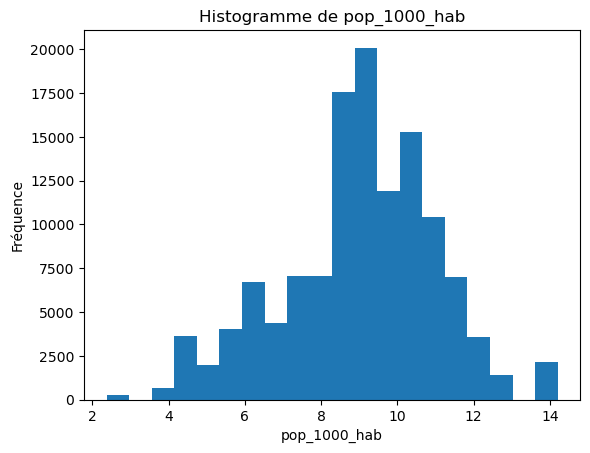

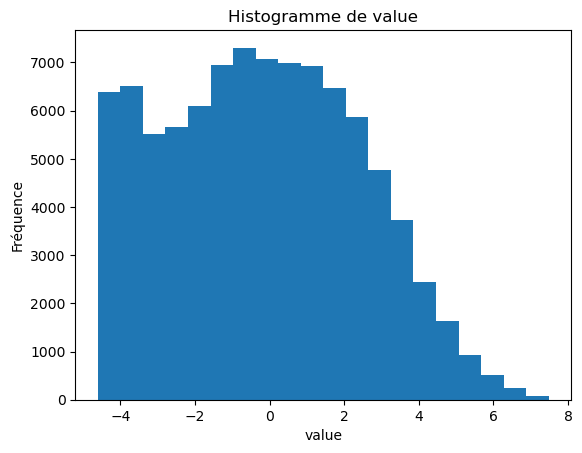

In [1344]:
numeric_cols = ["pop_1000_hab", "value"]

for col in numeric_cols:
    plt.figure()
    data = df_v2[col]
    
    data = data.replace([np.inf, -np.inf], np.nan)
    data = np.log(data[data > 0])
    xlabel = col
    plt.hist(data.dropna(), bins=20)
    plt.xlabel(xlabel)
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de {col}")
    plt.show()

- nettoyage et utilisation de mask pour la suite

In [1345]:
for df in [yr_2018, yr_2019, df_v2]:
    df.drop(df.columns[0], axis=1, inplace=True)

/tmp/ipykernel_51922/21439232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[0], axis=1, inplace=True)
/tmp/ipykernel_51922/21439232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[0], axis=1, inplace=True)


In [1346]:
yr_2018 = yr_2018.drop_duplicates(subset=["pop_1000_hab"])
yr_2019 = yr_2019.drop_duplicates(subset=["pop_1000_hab"])

In [1347]:
yr_2019 = yr_2019.drop(yr_2019.loc[yr_2019["area"] == "China, mainland"].index)
yr_2018 = yr_2018.drop(yr_2018.loc[yr_2018["area"] == "China, mainland"].index)


In [1348]:
pop_2019 = yr_2019.groupby("area")["pop_1000_hab"].sum()
pop_2018 = yr_2018.groupby("area")["pop_1000_hab"].sum()

- Quelle est la population de l’Ukraine en 2018 

In [1349]:
ukraine_pop = pop_2018.loc["Ukraine"]
print("Population de l'Ukraine est de :", ukraine_pop *1000 , "habitant")

Population de l'Ukraine est de : 44246000.0 habitant


- Quels sont les 10 pays les plus peuplés ?


In [1350]:
top_10_pop = pop_2019.sort_values(ascending=False)[:10]
print(top_10_pop)

area
China                       1465634.16
India                       1366417.75
United States of America     329064.92
Indonesia                    270625.57
Pakistan                     216565.32
Brazil                       211049.53
Nigeria                      200963.60
Bangladesh                   163046.16
Russian Federation           145872.26
Mexico                       127575.53
Name: pop_1000_hab, dtype: float64


- Quelle est la population mondiale en 2018 ? En 2019 

In [1351]:
pop_2018.sum()*1000

7599839240.0

In [1352]:
pop_2019.sum().round(1)*1000

7700662500.0

- Pour quels pays dispose-t-on du moins d’informations ? Donnez-en 5.

In [1353]:
valeur_manquant_pays = df_v2.isna().isnull().groupby("area")["value"].sum()
valeur_manquant_pays


area
False    0
Name: value, dtype: int64

Pas de valeurs manquant ?!

In [1354]:
df_v2

,area_code_(fao),area,item,year,type,element,pop_1000_hab,value,zone
0,4,Afghanistan,Bovine Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,2.62,southern_asia
1,4,Afghanistan,Bovine Meat,2018,animal,Food supply (kcal/capita/day),37172.00,15.42,southern_asia
2,4,Afghanistan,Bovine Meat,2018,animal,Protein supply quantity (g/capita/day),37172.00,1.09,southern_asia
3,4,Afghanistan,Bovine Meat,2018,animal,Fat supply quantity (g/capita/day),37172.00,1.20,southern_asia
4,4,Afghanistan,Mutton & Goat Meat,2018,animal,Food supply quantity (kg/capita/yr),37172.00,4.26,southern_asia
...,...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,Infant food,2019,vegetal,Fat supply quantity (g/capita/day),14645.47,0.00,eastern_africa
124996,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply quantity (kg/capita/yr),14645.47,2.62,eastern_africa
124997,716,Zimbabwe,Miscellaneous,2019,vegetal,Food supply (kcal/capita/day),14645.47,2.94,eastern_africa
124998,716,Zimbabwe,Miscellaneous,2019,vegetal,Protein supply quantity (g/capita/day),14645.47,0.09,eastern_africa


- Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays.
-  Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [1355]:
df_merge = yr_2018.merge(yr_2019[["area", "pop_1000_hab"]], on="area", suffixes=("_2018", "_2019"))
df_merge["taux_croissance_pop_18_19"] = (df_merge["pop_1000_hab_2019"] - df_merge["pop_1000_hab_2018"]) / df_merge["pop_1000_hab_2018"] * 100
df_v2 = df_v2.merge(df_merge[["area", "taux_croissance_pop_18_19"]], on="area")


In [1356]:
top5_croissance = df_v2[["area", "taux_croissance_pop_18_19"]].drop_duplicates(subset="area").sort_values(by="taux_croissance_pop_18_19", ascending=False).head(5)
print(top5_croissance)

                                    area  taux_croissance_pop_18_19
80113                              Niger                   3.866328
112029                            Uganda                   3.605490
1944                              Angola                   3.295326
30812   Democratic Republic of the Congo                   3.238423
15656                            Burundi                   3.178508


- Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [1357]:
df_v2.groupby(by=["zone"])["taux_croissance_pop_18_19"].mean().sort_values(ascending=False)

zone
western_africa           2.644190
middle_africa            2.622557
eastern_africa           2.330392
melanesia                1.740015
central_asia             1.713499
northern_africa          1.708496
southern_asia            1.601317
southern_africa          1.464938
micronesia               1.387931
central_america          1.373756
western_asia             1.297284
south_eastern_asia       1.170827
australia_new_zealand    1.034118
south_america            0.898820
northern_america         0.755043
caribbean                0.644223
eastern_asia             0.634538
polynesia                0.511580
western_europe           0.269034
northern_europe          0.218679
southern_europe         -0.176961
eastern_europe          -0.217190
Name: taux_croissance_pop_18_19, dtype: float64

- Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines


In [1396]:
food_kcal = df_v2[df_v2["element"] == "Food supply (kcal/capita/day)"]
protein_g = df_v2[df_v2["element"] == "Protein supply quantity (g/capita/day)"]

total_food_kcal = food_kcal.groupby(["area", "year"], as_index=False)["value"].sum()
total_food_kcal["value"] = total_food_kcal["value"] * 365

total_protein_g = protein_g.groupby(["area", "year"], as_index=False)["value"].sum()
total_protein_g["value"] = total_protein_g["value"] / 1000 * 365

total_food_kcal.rename(columns={"value": "total_kcal"}, inplace=True)
total_protein_g.rename(columns={"value": "total_protein_kg"}, inplace=True)

total_food_supply = pd.merge(total_food_kcal, total_protein_g, on=["area", "year"])
total_food_supply
#total_food_supply.sort_values(by="total_protein_kg", ascending=False)

,area,year,total_kcal,total_protein_kg
0,Afghanistan,2018,828568.25,21.04225
1,Afghanistan,2019,816275.05,20.46190
2,Albania,2018,1203226.15,41.19025
3,Albania,2019,1210274.30,42.14655
4,Algeria,2018,1234860.70,33.02155
...,...,...,...,...
351,Yemen,2019,753856.40,19.70270
352,Zambia,2018,824553.25,21.45470
353,Zambia,2019,814698.25,18.96905
354,Zimbabwe,2018,755458.75,20.88530


- Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment

- calculez le pourcentage de protéine de chaque aliment.


In [1386]:
food_sup_kg = df_v2[df_v2["element"] == "Food supply quantity (kg/capita/yr)"]
protein_sup_g = df_v2[df_v2["element"] == "Protein supply quantity (g/capita/day)"]

merged_df = pd.merge(food_sup_kg, protein_sup_g, on=["area_code_(fao)", "area", "item", "year", "type", "zone"], suffixes=("_kg", "_protein"))
merged_df['protein_kg'] = merged_df['value_protein'] / 1000
merged_df["protein_%"] = (merged_df["protein_kg"] / merged_df["value_kg"]) * 100

print(merged_df[["item", "protein_%"]])

                       item  protein_%
0               Bovine Meat   0.041603
1        Mutton & Goat Meat   0.038967
2                   Pigmeat   0.100000
3              Poultry Meat   0.035417
4               Meat, Other   0.045161
...                     ...        ...
30366                  Beer   0.001401
30367  Beverages, Fermented   0.001340
30368  Beverages, Alcoholic   0.000000
30369           Infant food   0.040000
30370         Miscellaneous   0.003435

[30371 rows x 2 columns]


- Quels sont les 10 aliments les plus caloriques ?

In [1425]:
kcal_grp = kcal.groupby("item")["value"].mean().round(2).reset_index()
top_10_kcal_grp = kcal_grp.sort_values(by="value", ascending=False).head(10)

print(top_10_kcal_grp)

                       item   value
94       Wheat and products  569.19
73        Rice and products  298.37
83   Sugar (Raw Equivalent)  247.02
40       Maize and products  185.90
44  Milk - Excluding Butter  178.67
64                  Pigmeat   91.50
11     Cassava and products   83.45
69             Poultry Meat   78.82
58                 Palm Oil   69.71
80             Soyabean Oil   65.47


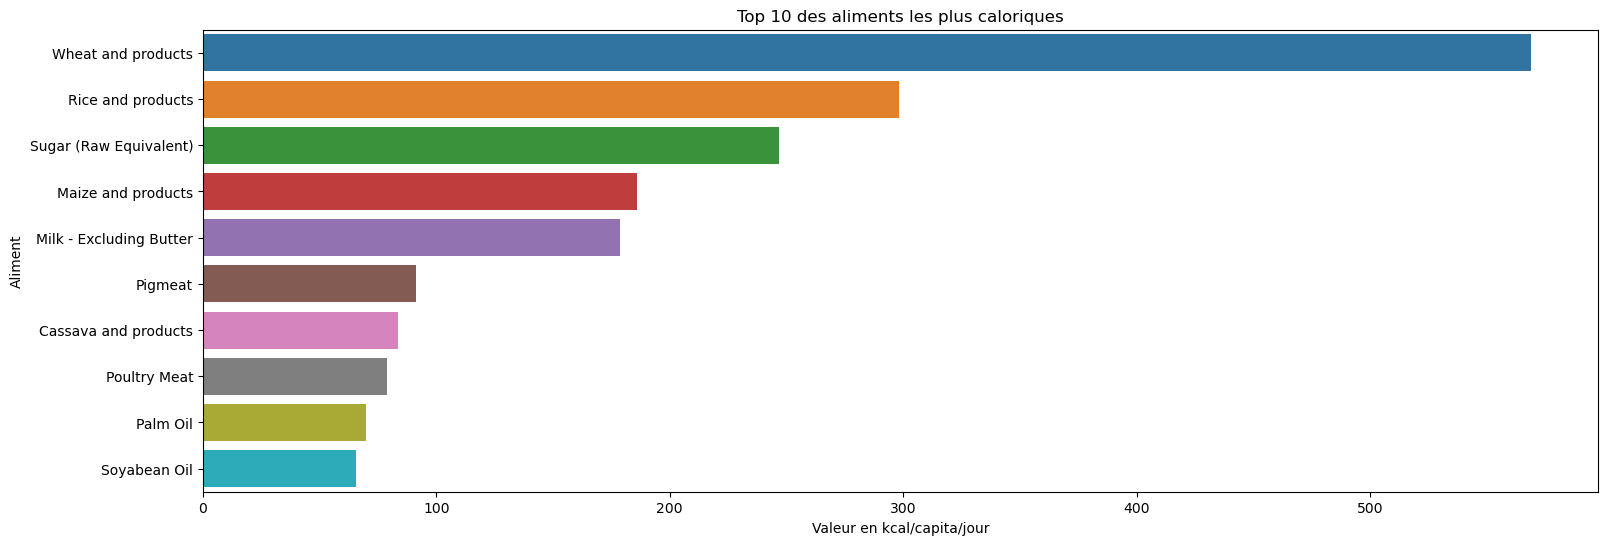

In [1446]:
plt.figure(figsize=(18, 6))
sns.barplot(data=top_10_kcal_grp, x="value", y="item")
plt.xlabel("Valeur en kcal/capita/jour")
plt.ylabel("Aliment")
plt.title("Top 10 des aliments les plus caloriques")
plt.show()

In [1426]:
protein_grp = protein.groupby("item")["value"].mean().round(2).reset_index()
top_10_protein_grp = protein_grp.sort_values(by="value", ascending=False).head(10)

print(top_10_protein_grp)

                       item  value
94       Wheat and products  16.61
44  Milk - Excluding Butter  10.71
69             Poultry Meat   7.54
73        Rice and products   5.77
40       Maize and products   4.66
9               Bovine Meat   4.25
64                  Pigmeat   4.08
62             Pelagic Fish   2.41
26                     Eggs   2.21
93        Vegetables, other   2.20


- Quels sont les 10 aliments les plus riches en protéine

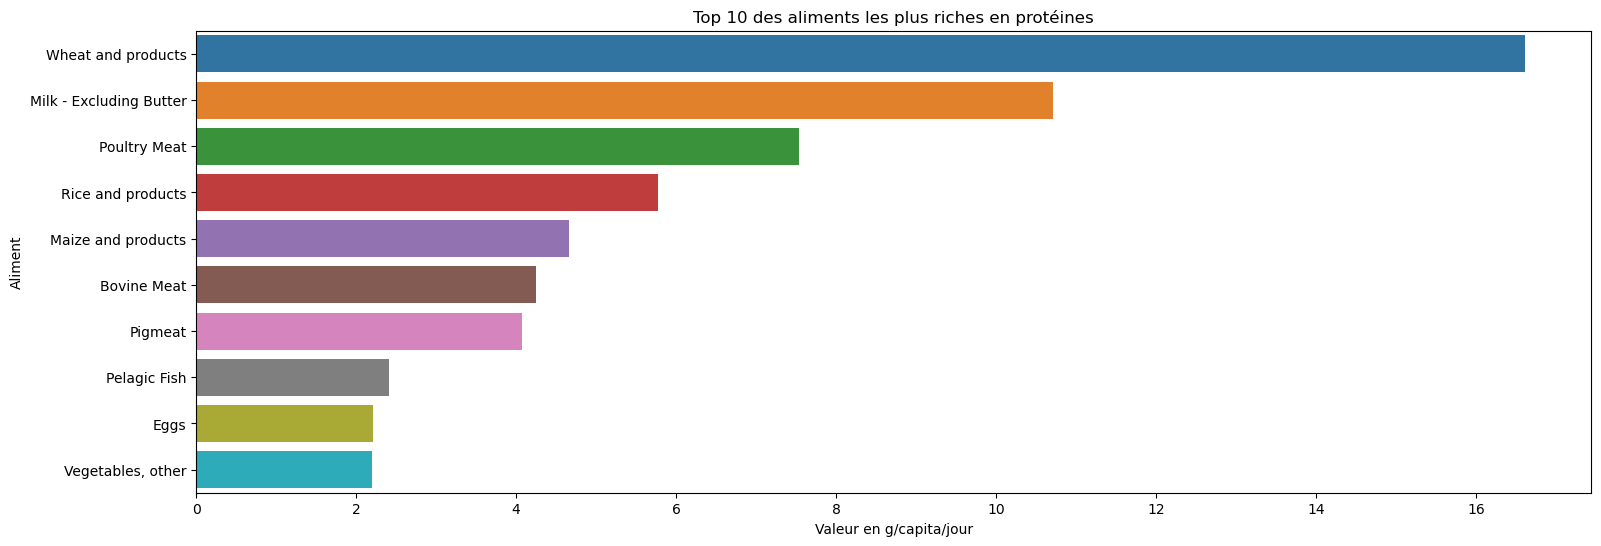

In [1445]:
plt.figure(figsize=(18, 6))
sns.barplot(data=top_10_protein_grp, x="value", y="item")
plt.xlabel("Valeur en g/capita/jour")
plt.ylabel("Aliment")
plt.title("Top 10 des aliments les plus riches en protéines")
plt.show()

- boite a moustache de la quantité de nourriture disponible par habitant en kcal par zone géographique


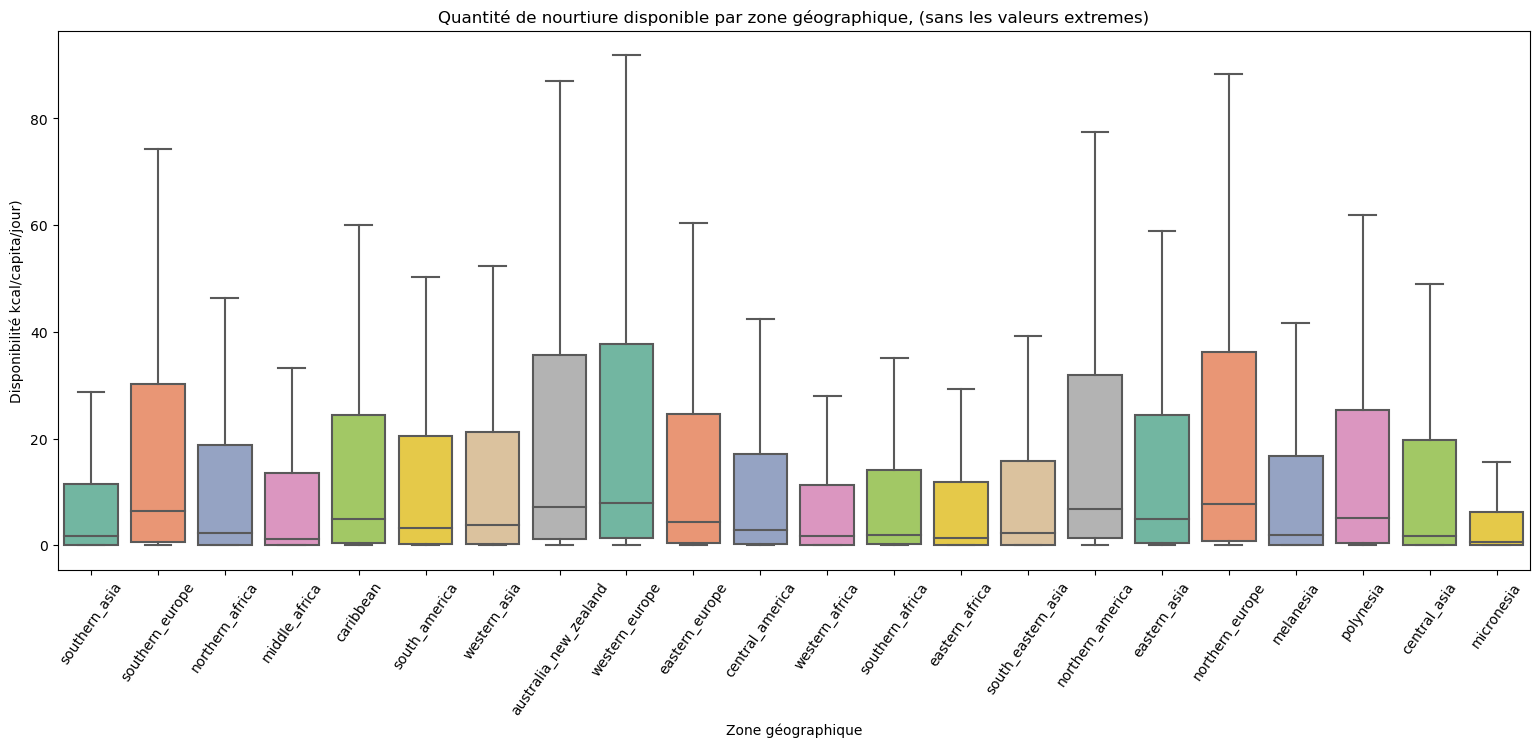

In [1444]:
kcal = df_v2[df_v2["element"] == "Food supply (kcal/capita/day)"]

plt.figure(figsize=(19, 7))
boxplot = sns.boxplot(data=kcal, x="zone", y="value", palette="Set2", showfliers=False)
plt.xticks(rotation=55)
plt.xlabel("Zone géographique")
plt.ylabel("Disponibilité kcal/capita/jour)")
plt.title("Quantité de nourtiure disponible par zone géographique, (sans les valeurs extremes)")
plt.show()